In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn import tree
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
%matplotlib inline

In [3]:
# memanggil data
file = 'Autism.csv'
header = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age','Gender','Ethnicity','Jundice','Autism',
          'Country','UAB','Result','Age_desc','Relation','Class']
autis = pd.read_csv(file, names=header)
autis

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Gender,Ethnicity,Jundice,Autism,Country,UAB,Result,Age_desc,Relation,Class
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,'18 and more',?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO


In [4]:
# menghitung jumlah tiap kolom
for column in autis.columns.values.tolist():
    print(column)
    print (autis[column].value_counts())
    print("")

A1
1    508
0    196
Name: A1, dtype: int64

A2
0    385
1    319
Name: A2, dtype: int64

A3
0    382
1    322
Name: A3, dtype: int64

A4
0    355
1    349
Name: A4, dtype: int64

A5
0    353
1    351
Name: A5, dtype: int64

A6
0    504
1    200
Name: A6, dtype: int64

A7
0    410
1    294
Name: A7, dtype: int64

A8
1    457
0    247
Name: A8, dtype: int64

A9
0    476
1    228
Name: A9, dtype: int64

A10
1    404
0    300
Name: A10, dtype: int64

Age
21     49
20     46
22     37
23     37
19     35
24     34
27     31
18     31
30     30
26     28
29     27
25     27
28     24
31     21
17     18
32     18
35     17
37     17
40     16
33     16
42     15
36     13
38     12
34     12
43     11
44     10
47      8
39      7
53      6
55      6
46      6
50      5
52      5
48      4
45      4
49      3
41      3
54      2
61      2
?       2
56      2
58      2
59      1
51      1
60      1
64      1
383     1
Name: Age, dtype: int64

Gender
m    367
f    337
Name: Gender, dtype: int

In [5]:
# mengganti '?' dengan nan
autis.replace("?", np.nan, inplace = True)

# mengubah NO YES menjadi no yes
# autis['Class'].astype(str).str.lower()

autis.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Gender,Ethnicity,Jundice,Autism,Country,UAB,Result,Age_desc,Relation,Class
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [6]:
# melihat data yg hilang
autisMiss = autis.isnull()
autisMiss.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Gender,Ethnicity,Jundice,Autism,Country,UAB,Result,Age_desc,Relation,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [7]:
#menghitung jumlah missing value tiap kolom
for column in autisMiss.columns.values.tolist():
    print(column)
    print (autisMiss[column].value_counts())
    print("")

A1
False    704
Name: A1, dtype: int64

A2
False    704
Name: A2, dtype: int64

A3
False    704
Name: A3, dtype: int64

A4
False    704
Name: A4, dtype: int64

A5
False    704
Name: A5, dtype: int64

A6
False    704
Name: A6, dtype: int64

A7
False    704
Name: A7, dtype: int64

A8
False    704
Name: A8, dtype: int64

A9
False    704
Name: A9, dtype: int64

A10
False    704
Name: A10, dtype: int64

Age
False    702
True       2
Name: Age, dtype: int64

Gender
False    704
Name: Gender, dtype: int64

Ethnicity
False    609
True      95
Name: Ethnicity, dtype: int64

Jundice
False    704
Name: Jundice, dtype: int64

Autism
False    704
Name: Autism, dtype: int64

Country
False    704
Name: Country, dtype: int64

UAB
False    704
Name: UAB, dtype: int64

Result
False    704
Name: Result, dtype: int64

Age_desc
False    704
Name: Age_desc, dtype: int64

Relation
False    609
True      95
Name: Relation, dtype: int64

Class
False    704
Name: Class, dtype: int64



In [8]:
# menghilangkan kolom yang kurang relevan
autis.drop(['Ethnicity','Country','Age_desc','Relation'], axis=1, inplace=True)

# mengganti nan dengan modus
autis['Age'].replace(np.nan, '21', inplace=True)

print(autis, autis.dtypes)

     A1  A2  A3  A4  A5  A6  A7  A8  A9  A10 Age Gender Jundice Autism UAB  \
0     1   1   1   1   0   0   1   1   0    0  26      f      no     no  no   
1     1   1   0   1   0   0   0   1   0    1  24      m      no    yes  no   
2     1   1   0   1   1   0   1   1   1    1  27      m     yes    yes  no   
3     1   1   0   1   0   0   1   1   0    1  35      f      no    yes  no   
4     1   0   0   0   0   0   0   1   0    0  40      f      no     no  no   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..    ...     ...    ...  ..   
699   0   1   0   1   1   0   1   1   1    1  25      f      no     no  no   
700   1   0   0   0   0   0   0   1   0    1  34      m      no     no  no   
701   1   0   1   1   1   0   1   1   0    1  24      f      no     no  no   
702   1   0   0   1   1   0   1   0   1    1  35      m      no     no  no   
703   1   0   1   1   1   0   1   1   1    1  26      f      no     no  no   

     Result Class  
0         6    NO  
1         5    NO  
2  

In [9]:
# mengganti type Age
autis['Age'] = autis[['Age']].astype('int64')
autis.dtypes

A1          int64
A2          int64
A3          int64
A4          int64
A5          int64
A6          int64
A7          int64
A8          int64
A9          int64
A10         int64
Age         int64
Gender     object
Jundice    object
Autism     object
UAB        object
Result      int64
Class      object
dtype: object

In [10]:
# menghilangkan baris 52 karena ada pecilan umur (383)
autis.drop([52], axis=0, inplace=True)
autis.reset_index(drop=True, inplace=True)

autis
print(autis.info(), autis.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A1       703 non-null    int64 
 1   A2       703 non-null    int64 
 2   A3       703 non-null    int64 
 3   A4       703 non-null    int64 
 4   A5       703 non-null    int64 
 5   A6       703 non-null    int64 
 6   A7       703 non-null    int64 
 7   A8       703 non-null    int64 
 8   A9       703 non-null    int64 
 9   A10      703 non-null    int64 
 10  Age      703 non-null    int64 
 11  Gender   703 non-null    object
 12  Jundice  703 non-null    object
 13  Autism   703 non-null    object
 14  UAB      703 non-null    object
 15  Result   703 non-null    int64 
 16  Class    703 non-null    object
dtypes: int64(12), object(5)
memory usage: 93.5+ KB
None                A1          A2          A3          A4          A5          A6  \
count  703.000000  703.000000  703.000000  703.000000 

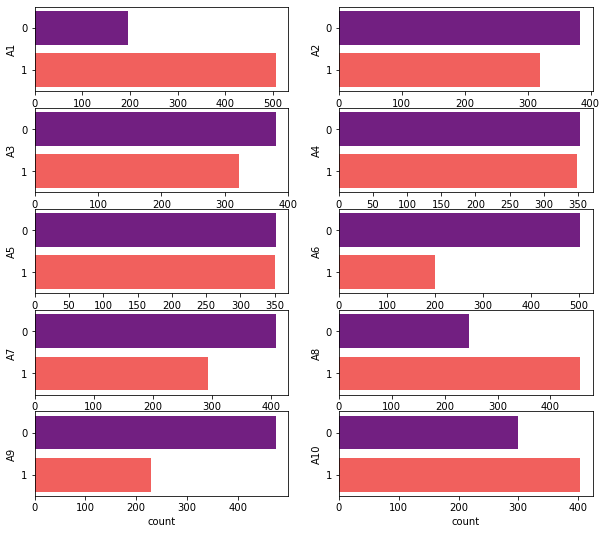

In [11]:
# visualisasi data
f,ax = plt.subplots(5,2, figsize=(10,9))
for i, subplot, in zip(autis.columns[0:10], ax.flatten()):
    sns.countplot(y=autis[i],
                  ax=subplot,
                  palette='magma',
                  saturation=1)

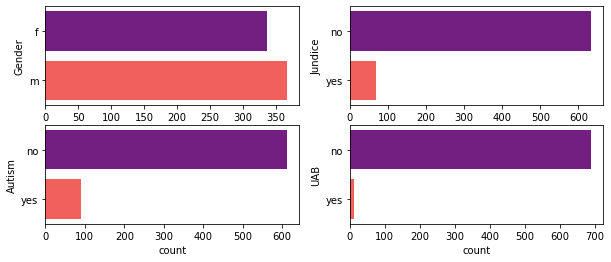

In [12]:
# visualisasi data
f,ax = plt.subplots(2,2, figsize=(10,4))
for j, subplot, in zip(autis.columns[11:15], ax.flatten()):
    sns.countplot(y=autis[j],
                  ax=subplot,
                  palette='magma',
                  saturation=1)

<AxesSubplot:xlabel='Age', ylabel='count'>

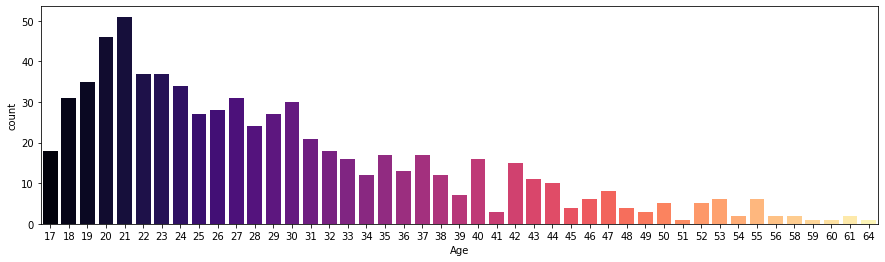

In [13]:
f,ax = plt.subplots(1,1, figsize=(15,4))
sns.countplot(x=autis['Age'],
              ax=ax,
              palette='magma',
              saturation=1)

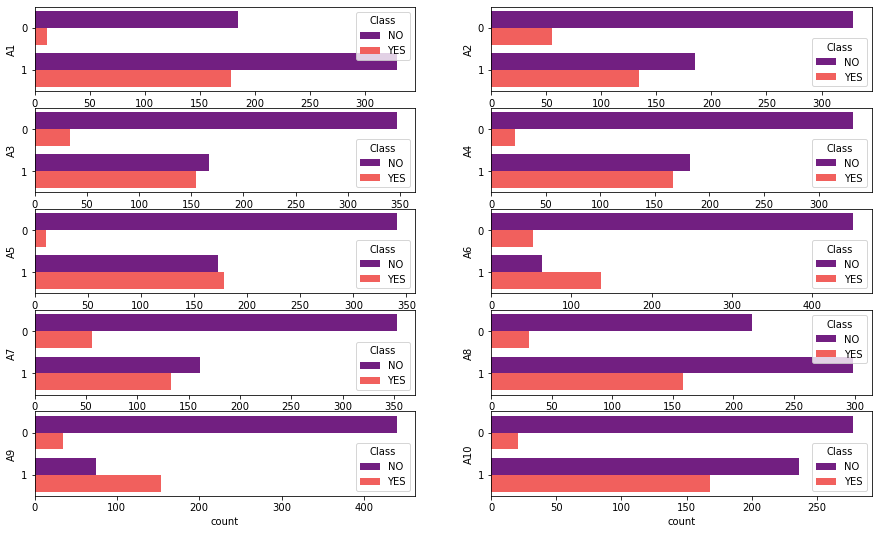

In [14]:
# visualisasi terhadap class
f,ax = plt.subplots(5,2, figsize=(15,9))
for i, subplot, in zip(autis.columns[0:10], ax.flatten()):
    sns.countplot(y=autis[i],
                  hue=autis['Class'],
                  ax=subplot,
                  palette='magma',
                  saturation=1)

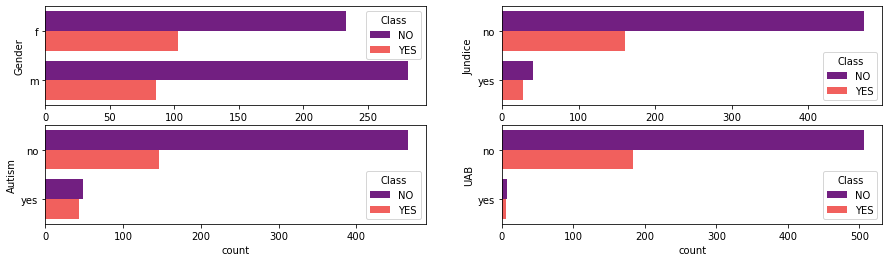

In [15]:
# visualisasi terhadap class
f,ax = plt.subplots(2,2, figsize=(15,4))
for j, subplot, in zip(autis.columns[11:15], ax.flatten()):
    sns.countplot(y=autis[j],
                  ax=subplot,
                  hue=autis['Class'],
                  palette='magma',
                  saturation=1)

<AxesSubplot:xlabel='Age', ylabel='count'>

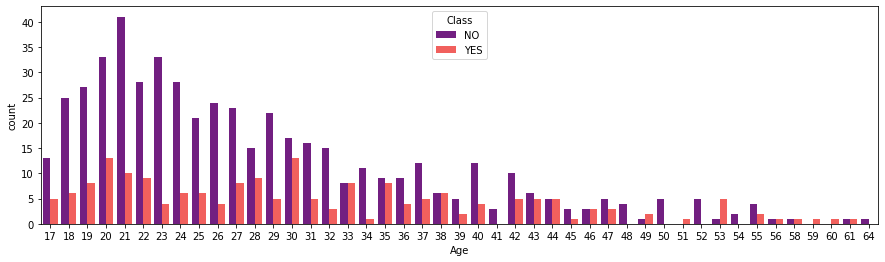

In [16]:
f,ax = plt.subplots(1,1, figsize=(15,4))
sns.countplot(x=autis['Age'],
              ax=ax,
               hue=autis['Class'],
              palette='magma',
              saturation=1)

In [17]:
# mengubah kategorik menjadi boolean
autis['Gender'] = autis['Gender'].map({'m':1,'f':0})
autis['Class'] = autis['Class'].map({'YES':1,'NO':0})

def convertToBool(column_name):
    autis[column_name] = autis[column_name].map({'yes':1,'no':0})

listColName = ['Jundice','Autism','UAB']
for i in listColName:
    convertToBool(i)

autis

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Gender,Jundice,Autism,UAB,Result,Class
0,1,1,1,1,0,0,1,1,0,0,26,0,0,0,0,6,0
1,1,1,0,1,0,0,0,1,0,1,24,1,0,1,0,5,0
2,1,1,0,1,1,0,1,1,1,1,27,1,1,1,0,8,1
3,1,1,0,1,0,0,1,1,0,1,35,0,0,1,0,6,0
4,1,0,0,0,0,0,0,1,0,0,40,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,0,1,0,1,1,0,1,1,1,1,25,0,0,0,0,7,1
699,1,0,0,0,0,0,0,1,0,1,34,1,0,0,0,3,0
700,1,0,1,1,1,0,1,1,0,1,24,0,0,0,0,7,1
701,1,0,0,1,1,0,1,0,1,1,35,1,0,0,0,6,0


In [18]:
autis.corr()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Gender,Jundice,Autism,UAB,Result,Class
A1,1.000000,0.012354,0.074973,0.128816,0.170417,0.110818,0.218458,0.149079,0.146154,0.119586,0.010941,-0.074167,-0.018792,0.098007,-0.040515,0.399617,0.298323
A2,0.012354,1.000000,0.222997,0.157918,0.152728,0.185209,-0.042912,0.033711,0.204715,0.067484,0.082337,-0.048811,0.112263,0.074108,-0.009821,0.391433,0.310862
A3,0.074973,0.222997,1.000000,0.411962,0.263970,0.268260,0.077195,0.016025,0.314505,0.167199,0.100077,-0.000569,0.061371,0.113273,0.055181,0.551606,0.440662
A4,0.128816,0.157918,0.411962,1.000000,0.305830,0.294553,0.150224,0.006712,0.327037,0.209678,0.109226,-0.058066,0.064503,0.193432,0.022901,0.585249,0.469542
A5,0.170417,0.152728,0.263970,0.305830,1.000000,0.391849,0.237678,0.100360,0.396015,0.266358,0.009117,-0.041229,0.033937,0.089535,0.000187,0.639052,0.536665
A6,0.110818,0.185209,0.268260,0.294553,0.391849,1.000000,0.174869,0.099063,0.479100,0.293759,0.093234,-0.084639,0.078099,0.113747,0.087286,0.629878,0.591870
A7,0.218458,-0.042912,0.077195,0.150224,0.237678,0.174869,1.000000,0.083918,0.188807,0.251077,-0.001541,0.060721,0.030471,-0.009079,-0.022675,0.453988,0.350970
A8,0.149079,0.033711,0.016025,0.006712,0.100360,0.099063,0.083918,1.000000,0.100560,0.098761,-0.062415,0.062238,0.011479,0.034148,-0.041465,0.321994,0.236361
A9,0.146154,0.204715,0.314505,0.327037,0.396015,0.479100,0.188807,0.100560,1.000000,0.282564,0.129396,0.005919,0.057416,0.167340,0.049454,0.661035,0.635362
A10,0.119586,0.067484,0.167199,0.209678,0.266358,0.293759,0.251077,0.098761,0.282564,1.000000,0.046875,-0.057068,0.051710,0.117458,-0.042119,0.536075,0.385387


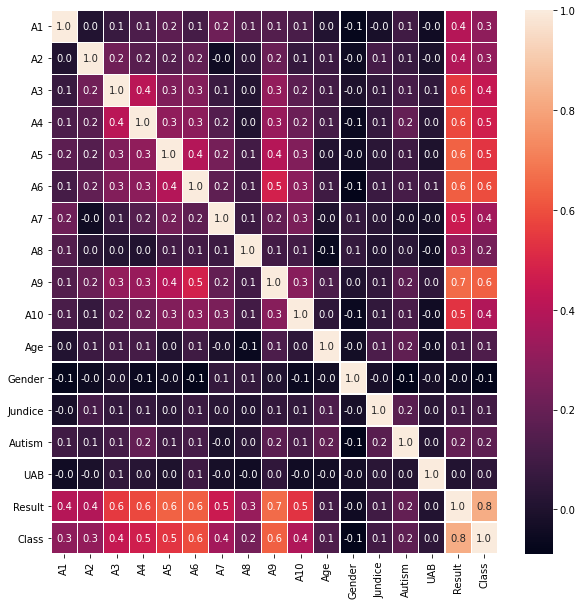

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(autis.corr(), annot=True, linewidths=.2, fmt= '.1f', ax=ax)
plt.show()

In [20]:
for i in autis:
    a = ttest_ind(autis[i], autis['Class'])
    if a.pvalue<0.05:
        print(i,'=', a.pvalue,': Berpengaruh signifikan terhadap class')
    else:
        print('\n', i,'=', a.pvalue,': Tidak berpengaruh\n')

A1 = 7.378074123801693e-72 : Berpengaruh signifikan terhadap class
A2 = 3.36560855187246e-13 : Berpengaruh signifikan terhadap class
A3 = 1.0027000734377464e-13 : Berpengaruh signifikan terhadap class
A4 = 5.818047939513671e-19 : Berpengaruh signifikan terhadap class
A5 = 2.1883861440886356e-19 : Berpengaruh signifikan terhadap class

 A6 = 0.5123166995197899 : Tidak berpengaruh

A7 = 3.0597907233866256e-09 : Berpengaruh signifikan terhadap class
A8 = 3.331185402981236e-50 : Berpengaruh signifikan terhadap class
A9 = 0.022772862273274883 : Berpengaruh signifikan terhadap class
A10 = 1.2731551690198133e-32 : Berpengaruh signifikan terhadap class
Age = 0.0 : Berpengaruh signifikan terhadap class
Gender = 5.675867599057479e-23 : Berpengaruh signifikan terhadap class
Jundice = 6.080729279619367e-17 : Berpengaruh signifikan terhadap class
Autism = 4.4212560592524355e-11 : Berpengaruh signifikan terhadap class
UAB = 3.4734915172354497e-44 : Berpengaruh signifikan terhadap class
Result = 9.06

In [21]:
# Putting feature variable to X
X = autis.drop(['Result','Class'], axis=1)

# Putting response variable to y
y = autis['Class']

In [22]:
# membagi data menjadi 80 persen data train dan 20 persen data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (562, 15)
Number transactions y_train dataset:  (562,)
Number transactions X_test dataset:  (141, 15)
Number transactions y_test dataset:  (141,)


In [23]:
autisTree = DecisionTreeClassifier(criterion='entropy')
autisTree

DecisionTreeClassifier(criterion='entropy')

In [24]:
autisTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
autisPredTrain = autisTree.predict(X_train)
print(autisPredTrain[0:5])
print(y_train[0:5])
print("\nDecisionTree's Accuracy:", metrics.accuracy_score(y_train, autisPredTrain))
print('\n',y_train.value_counts())

[0 0 0 1 0]
494    0
501    0
279    0
523    1
531    0
Name: Class, dtype: int64

DecisionTree's Accuracy: 1.0

 0    411
1    151
Name: Class, dtype: int64


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

#Train
print(confusion_matrix(autisPredTrain, y_train))
print(classification_report(autisPredTrain, y_train))

[[411   0]
 [  0 151]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       151

    accuracy                           1.00       562
   macro avg       1.00      1.00      1.00       562
weighted avg       1.00      1.00      1.00       562



In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(autisTree, X_train, y_train, cv=5)
scores.mean()

0.9377528445006321

In [28]:
autisPredTest = autisTree.predict(X_test)
print(autisPredTest[0:5])
print(y_test[0:5])
print("\nDecisionTree's Accuracy:", metrics.accuracy_score(y_test, autisPredTest))
print(y_test.value_counts())

[0 0 0 0 1]
412    0
491    0
333    0
272    0
248    1
Name: Class, dtype: int64

DecisionTree's Accuracy: 0.8794326241134752
0    103
1     38
Name: Class, dtype: int64


In [29]:
#Test
print(confusion_matrix(autisPredTest, y_test))
print(classification_report(autisPredTest, y_test))

[[94  8]
 [ 9 30]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       102
           1       0.79      0.77      0.78        39

    accuracy                           0.88       141
   macro avg       0.85      0.85      0.85       141
weighted avg       0.88      0.88      0.88       141



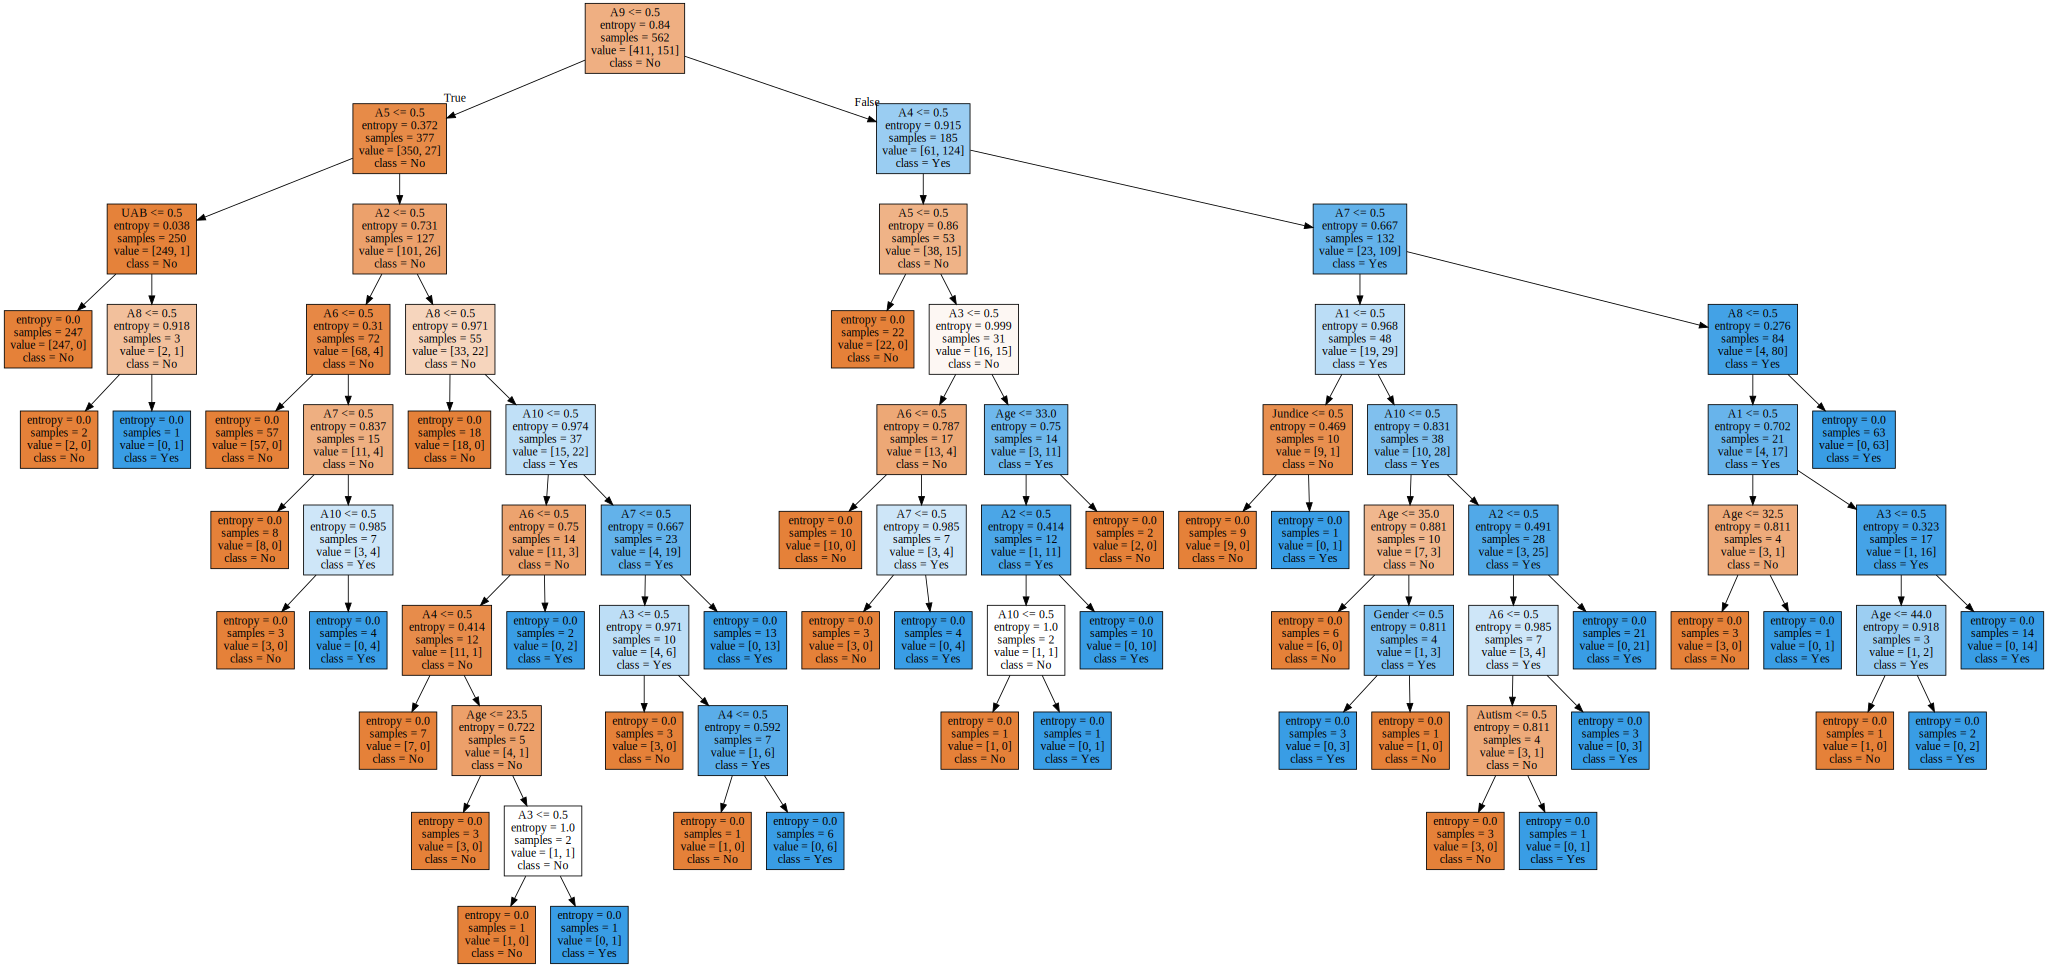

In [32]:
listX = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age','Gender','Jundice','Autism',
         'UAB']

# DOT data
autisDot = tree.export_graphviz(autisTree, out_file=None, feature_names=listX, class_names=['No', 'Yes'], filled=True)

# Draw graph
graph = graphviz.Source(autisDot, format="png") 
graph

In [ ]:
# saving decision tree graph

graph.render("decision_tree_graphivz_final")

In [ ]:
list=[]
for i in range(len(listX)):
    if i==0:
        add=int(input('Question 1:\n [0] No \n [1] Yes \n'))
        list.append(add)
    if i==1:
        add1=int(input('Question 2:\n [0] No \n [1] Yes \n'))
        list.append(add1)
    if i==2:
        add2=int(input('Question 3:\n [0] No \n [1] Yes \n'))
        list.append(add2)
    if i==3:
        add3=int(input('Question 4:\n [0] No \n [1] Yes \n'))
        list.append(add3)
    if i==4:
        add4=int(input('Question 5:\n [0] No \n [1] Yes \n'))
        list.append(add4)
    if i==5:
        add5=int(input('Question 6:\n [0] No \n [1] Yes \n'))
        list.append(add5)
    if i==6:
        add6=int(input('Question 7:\n [0] No \n [1] Yes \n'))
        list.append(add6)
    if i==7:
        add7=int(input('Question 8:\n [0] No \n [1] Yes \n'))
        list.append(add7)
    if i==8:
        add8=int(input('Question 9:\n [0] No \n [1] Yes \n'))
        list.append(add8)
    if i==9:
        add9=int(input('Question 10:\n [0] No \n [1] Yes \n'))
        list.append(add9)
    if i==10:
        add10=int(input('Berapakah Umur Anda? \n'))
        list.append(add10)
    if i==11:
        add11=int(input('Jenis Kelamin:\n [0] Wanita \n [1] Pria \n'))
        list.append(add11)
    if i==12:
        add12=int(input('Apakah Anda mengalami Jundice? \n [0] No \n [1] Yes \n'))
        list.append(add12)
    if i==13:
        add13=int(input('Apakah Anda mengalami Autism? \n [0] No \n [1] Yes \n'))
        list.append(add13)
    if i==14:
        add14=int(input('Apakah Anda sudah pernah menggunakan aplikasinya? \n [0] No \n [1] Yes \n'))
        list.append(add14)
        
a = autisTree.predict([list])
print('\n', a)
if a == 0:
    print('Anda diprediksi: Tidak Autis')
    print('Ingat untuk selalu jaga kesehatan.')
else:
    print('Anda diprediksi: Autis')
    print('Anda disarankan pergi ke dokter.')